In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols =["fLength","fWidth","fSize","fConc","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
216.0021,8.7967,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"]=(df["class"]=="g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
216.0021,8.7967,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


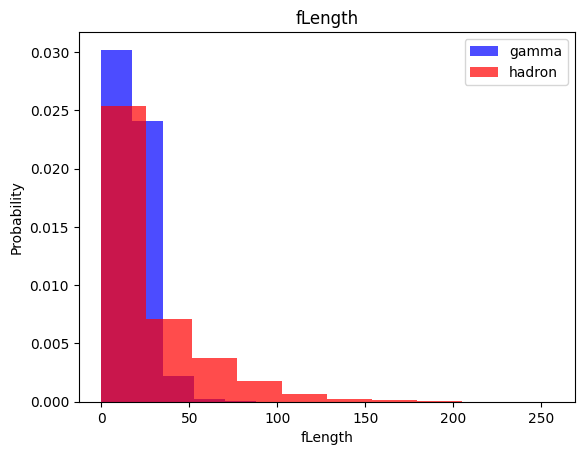

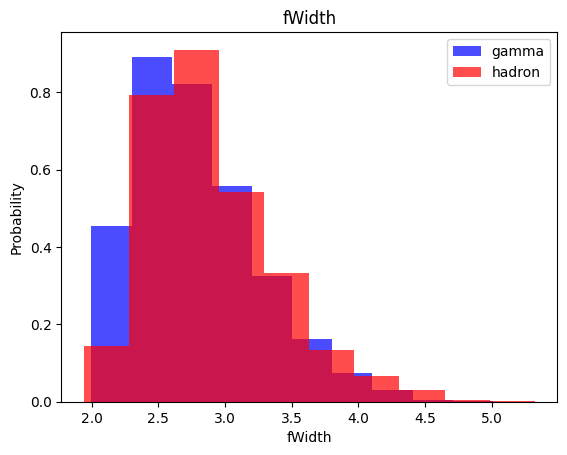

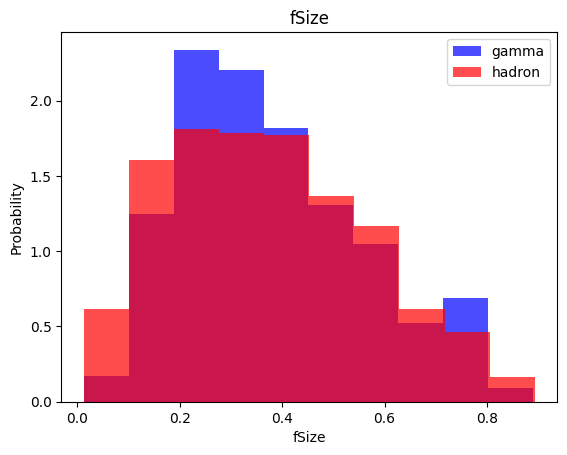

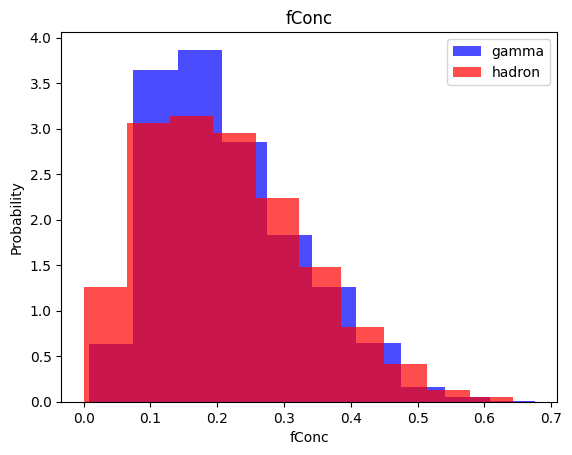

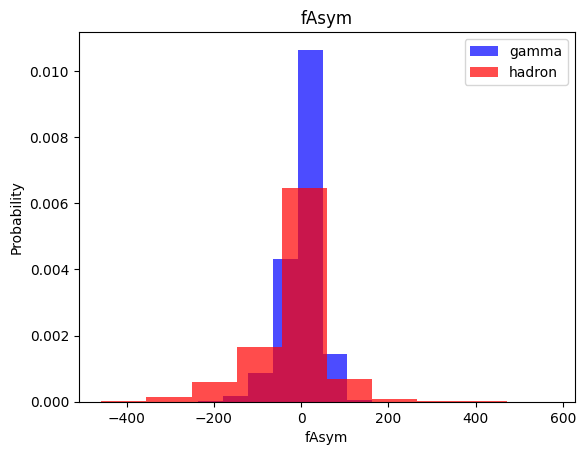

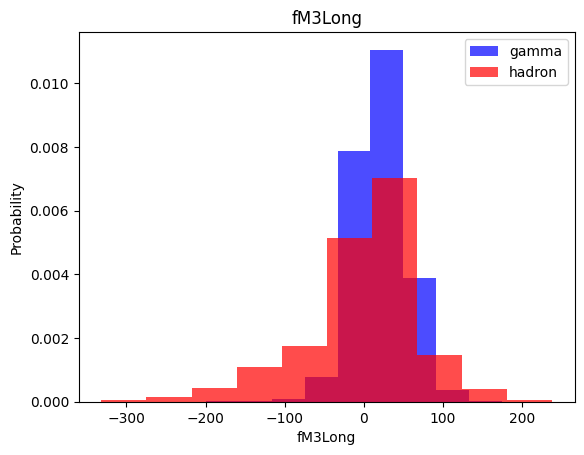

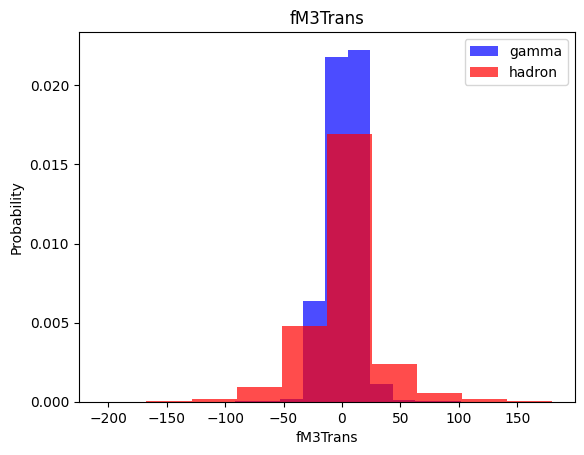

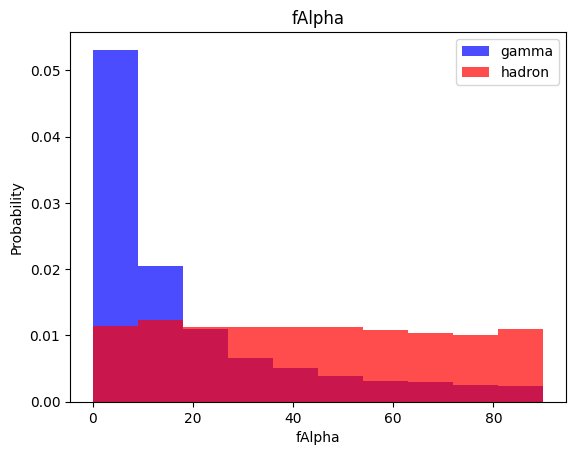

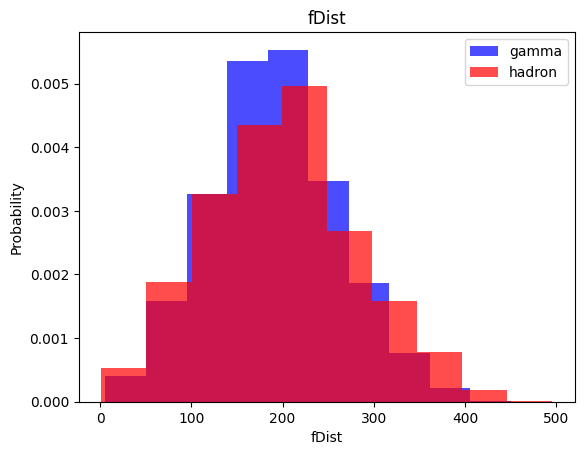

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label], color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()

# Train,validation,Test

In [9]:
print(len(df["class"]==1)) # gamma
print(len(df["class"]==0))

19020
19020


These values where 7419 and 3993 respectively so we oversampled them

In [7]:
train, valid, test = np.split(df.sample(frac=1).values, [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
def scale_dataset(data_array, oversample=False):
  X = data_array[:,:-1]
  y = data_array[:,-1]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train_data, X_train, y_train = scale_dataset(train, oversample=True) 
valid_data, X_valid, y_valid = scale_dataset(valid, oversample=False)
test_data, X_test, y_test = scale_dataset(test, oversample=False)

# kNN (k-nearest Neighbours)

This model works on shortest distance from a point.<br>
Used for Supervidsed learning(Classification & Regression)<br>
1. Choose k(no. of nearest neighbour to check) <br>
2. Calculate Distance(Euclidean Diatance)<br>
3. Find Neighbour sort them<br>
4. Vote and assigned <br>

Small K - High sensitivity to noise --> Overfitting<br>
Large K - Smooth decision --> Underfitting<br>

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
y_pred = knn_model.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      1326
         1.0       0.86      0.86      0.86      2478

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

